<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis?fbclid=IwAR0i1h5xhdJLGhJ3Pty5JieF47lablYiHAD4q16OIHGhsCIEGUQJGT4-DeE

Assumptions:

In [1]:
import pandas as pd

In [2]:
BFI_data = pd.read_csv('/content/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


##Factor Analysis'

##Assumption:

ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว

มีตัวแปร Factor (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

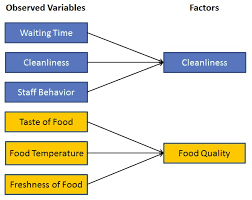

# Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be  *** perfect multicollinearity*** 

* There should not be ***homoscedasticity*** between the variables.

การกระจายของข้อมูล

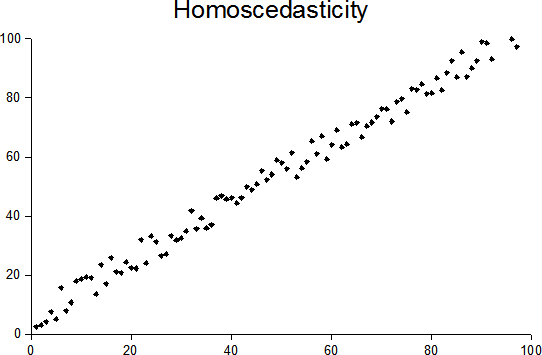

การทำ Factor Analysis มีประโยชน์ 2 อันดับ คือ

    1. Confirmatory
    2. Exploratory

## การทำ Factor Analysis

In [3]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

#ตอนแรกมันจะ error ว่า No module named 'factor_analyzer'

ModuleNotFoundError: ignored

แก้ไข error No module named 'factor_analyzer'

ด้วย !pip install factor_analyzer

วิธี install package อื่นๆ

In [4]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.7MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=e38fd876e20f6e7fee69a9dec7896227c878ceb8bf03f0fa029e3feffe25b2e5
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [5]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt    # = from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง  ``` .iloc[] ```



In [6]:
BFI_data_dropped = BFI_data.iloc[:,26]
BFI_data_dropped

0       1
1       2
2       2
3       2
4       1
       ..
2795    1
2796    1
2797    2
2798    1
2799    2
Name: gender, Length: 2800, dtype: int64

In [7]:
## เฉลย
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [8]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [9]:
BFI_data_dropped.shape

(2436, 25)

## Bartlett’s test

In [10]:
# ถ้า p-value  เข้าใกล้ 0 คือดี

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

## Kaiser-Meyer-Olkin (KMO) Test

ถ้า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949221

## Factor Analysis

Import

In [13]:
from factor_analyzer import  FactorAnalyzer

define


In [14]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [15]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [16]:
data_fa.shape

(2436, 20)

## วิธีตัดสินว่าเราจะลดเหลือกี่ dimention (มี factor ทั้งหมดกี่ตัว)

In [17]:
 ev, v = fa.get_eigenvalues()

#ใช้ eigen values

In [18]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

# Scree plot

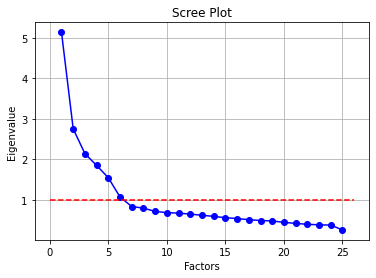

In [19]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev, 'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

## รัน Factor Analyzer อีกรอบด้วย paremeters จำนวน factor เท่ากับ 6

In [21]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [22]:
fa.loadings_.shape

(25, 20)

In [23]:
fa2.loadings_.shape

(25, 6)

 Plot factor loadings

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

## Matrix plot

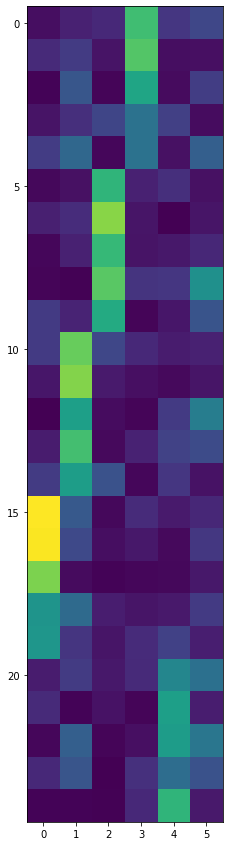

In [25]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

##กราฟแท่ง

Exploratory



In [26]:
fa2.loadings_[:,0]

array([ 0.03414726,  0.10978236,  0.00994059, -0.04831137, -0.16366166,
        0.02118698,  0.08090755,  0.01722769,  0.01485568,  0.15429252,
       -0.15383381,  0.05746695, -0.00134121, -0.07106632,  0.15942998,
        0.9074384 ,  0.90158503,  0.72774143,  0.46930559,  0.47694345,
       -0.06859678,  0.10806584, -0.01576963,  0.10573219,  0.00900362])

In [27]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

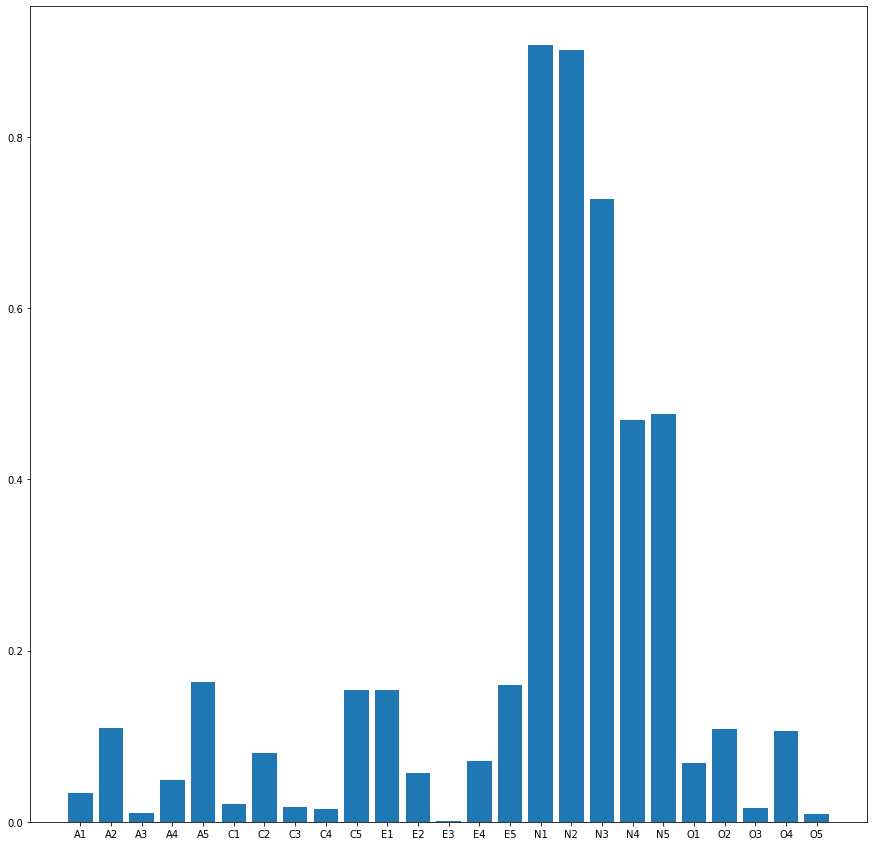

In [28]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

# **Exam 03**

ทำ Factor Analysis ข้อมูล Fifa 2018 

In [29]:
Fifa_data = pd.read_csv('/content/FIFA 2018 Statistics.csv')
Fifa_data.head()
## นำข้อมูล Fifa 2018 เข้ามา

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [30]:
Fifa_data.shape
## ดูขนาดของ ข้อมูลที่ยังไม่ได้ drop

(128, 27)

In [31]:
Fifa_data_dropped = Fifa_data.iloc[:,3:-7]
Fifa_data_dropped
## เลือกข้อมูล column จาก Goal Scored - Red

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [32]:
Fifa_data_dropped = Fifa_data_dropped.dropna()

In [33]:
Fifa_data_dropped.shape
# ดูขนาดของข้อมูลที่ drop แล้ว

(128, 17)

# **Bartlett's test**
ถ้าค่า p-value เข้าใกล้ 0 ข้อมูลดี

In [34]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Fifa_data_dropped)

chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

# *Output*
  เนื่องจากค่า p-value มีค่าเท่ากับ 2.7135 x 10^189  เป็นค่าที่เข้าใกล้ 0 ดังนั้นข้อมูลชุดนี้ดี

# **Kaiser-Meyer-Olkin (KMO) test**
ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไป Facto

In [35]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Fifa_data_dropped)

kmo_model

0.5594556344508279

#*Output* 
มีค่าเท่ากับ 0.5594556344508279  หรือ ประมาณ 0.559  สามารถปัดค่าได้เป็น 0.6 ซึ่งสามารถนำข้อมูลชุดนี้ไปทำ Factor Analysis ได้

# **Factor Analysis**

1. ***import***

In [46]:
from factor_analyzer import FactorAnalyzer

2. ***Define***

In [60]:
Fifa_fa = FactorAnalyzer(n_factors = 16)

3. ***Fit-transform***

In [61]:
data_Fifa_fa = Fifa_fa.fit_transform(Fifa_data_dropped)

In [62]:
data_Fifa_fa

array([[-1.02852235,  0.68412125,  2.62286805, ..., -0.05612406,
         2.0351202 ,  0.00670267],
       [ 0.72744829, -0.52418668, -1.07869132, ..., -0.47532661,
        -0.27870043, -1.12270704],
       [-0.64567505,  0.18211562, -0.56963708, ..., -0.67158922,
        -0.54465914,  0.72094628],
       ...,
       [ 1.10609582,  0.20784307, -0.31611388, ..., -0.01234134,
        -2.08744768,  1.30496366],
       [-1.18322117, -0.66996452,  1.80070509, ..., -0.96809174,
         0.43204393, -0.17162339],
       [ 0.84492141, -0.38027745, -0.25445187, ...,  0.30279289,
         0.13969374, -0.9408269 ]])

In [63]:
data_Fifa_fa.shape
#ดุขนาดของข้อมูล

(128, 16)

***วิธีตัดสินใจว่าจะเหลือกี่ dimention (มี factors ทั้งหมดกี่ตัว)***

In [64]:
ev,v = Fifa_fa.get_eigenvalues()

In [65]:
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

In [66]:
ev.shape

(17,)

## ***Scree plot***

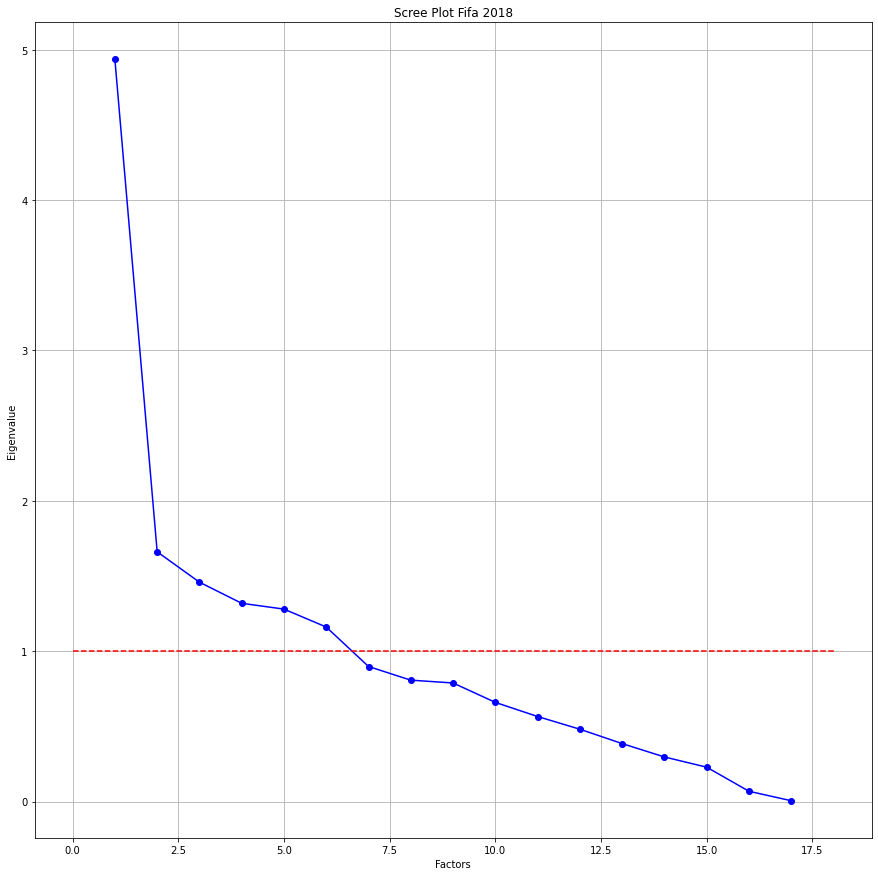

In [67]:
# Create scree plot using matplotlib
plt.plot(range(1,Fifa_data_dropped.shape[1]+1),ev, 'bo-')
plt.plot([0,Fifa_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot Fifa 2018')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Output
มี factor ทั้งหมด 17 ตัว ค่า factor ที่มากกว่า 1 โดย ใช้ eigenvalue plot คือ factor ที่สามารถมาเป็น factor ที่แฝงอยู่ได้

In [68]:
data_Fifa_fa[:,:6]

array([[-1.02852235e+00,  6.84121245e-01,  2.62286805e+00,
        -6.13275893e-02, -5.44092674e-02,  2.00934276e-01],
       [ 7.27448293e-01, -5.24186679e-01, -1.07869132e+00,
        -8.50925779e-01, -2.41176630e-01,  2.50883401e-01],
       [-6.45675050e-01,  1.82115619e-01, -5.69637077e-01,
         2.26028940e-01,  3.37982843e-02, -1.68147976e-01],
       [ 7.47704941e-01,  1.72940207e-01, -2.02499240e-01,
        -1.29479087e+00, -1.29504953e-01, -5.66581441e-02],
       [ 7.64590473e-01, -1.02338004e+00, -2.54183776e-01,
         6.17252933e-01,  1.72354639e-01,  2.04944359e-01],
       [-1.37927654e+00, -1.02367999e+00, -1.18075480e-01,
         9.43416646e-01, -7.19004216e-01, -5.47973852e-01],
       [-7.75361184e-01, -5.36622975e-01,  8.32824491e-01,
        -2.23469488e-01,  1.60618514e-01, -8.09773397e-02],
       [ 1.44271720e+00, -9.83264072e-02,  1.09942840e+00,
        -5.21200358e-01, -4.13879311e-01,  9.66101100e-02],
       [ 1.77079119e-01, -3.68717730e-01,  9.499

### ***รัน Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6***

In [69]:
from factor_analyzer import FactorAnalyzer
Fifa_fa2 = FactorAnalyzer(n_factors=6)
data_Fifa_fa = Fifa_fa2.fit_transform(Fifa_data_dropped)

In [70]:
Fifa_fa2.loadings_.shape

(17, 6)

***Plot factor loadings***

In [71]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

**Matrix plot**

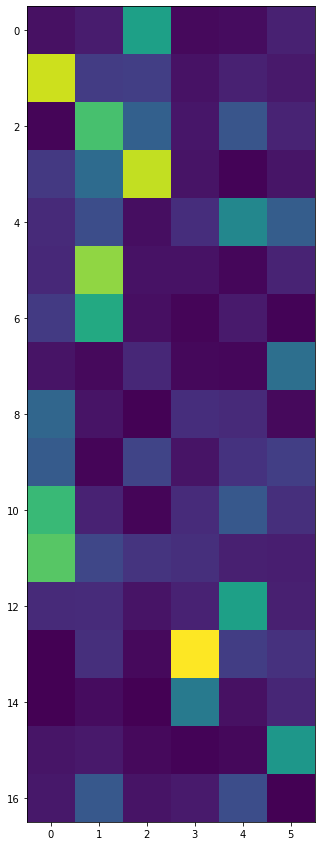

In [72]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(Fifa_fa2.loadings_))

# Output 
มีค่าอยู่ไม่กี่จุดที่มีสีสว่าง หมายถึง ยิ่งสีสว่างค่ายิ่งสูง

**Plot กราฟแท่ง**

Exploratory

In [73]:
Fifa_data_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

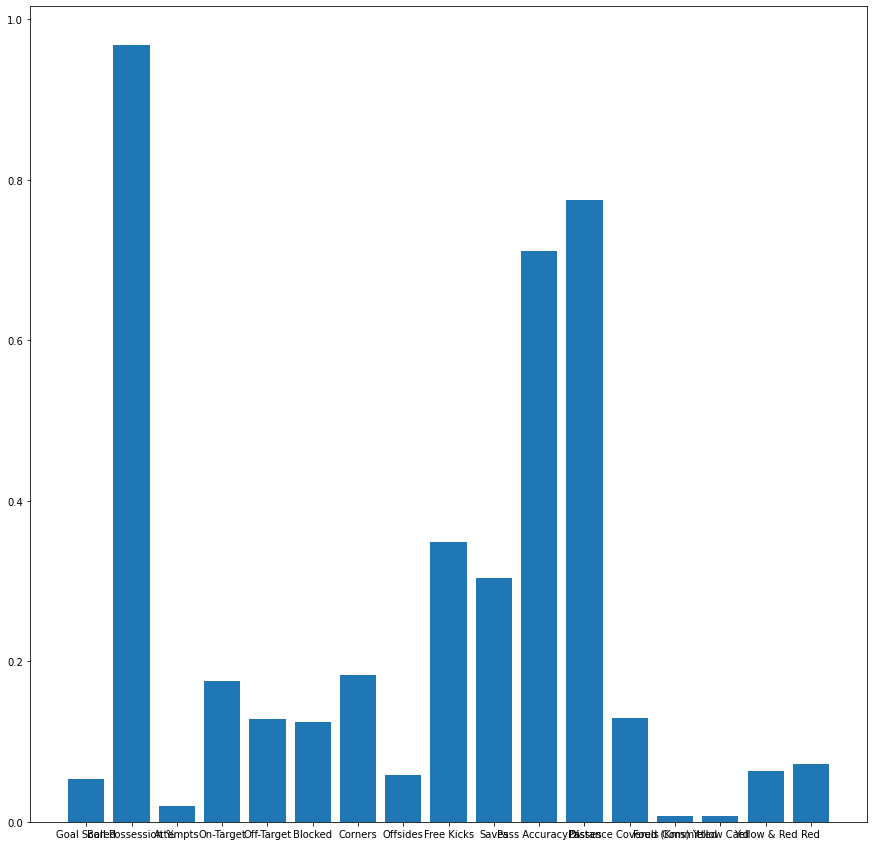

In [74]:
plt.bar(range(17),np.absolute(Fifa_fa2.loadings_[:,0]),tick_label=Fifa_data_dropped.columns)

จากกราฟ ข้อมูลBall Possession % มีค่าสูงที่สุด ถูกอธิบายด้วยfactor ตัวที่1 มากกว่า factor ตัวอื่น และ ข้อมูล Pass Accuracy และPasses เป็นข้อมูลที่อยู่ในกลุ่มเดียวกันเนื่องจากในกราฟแท่งข้อมูลเป็นค่าที่สูงเท่ากัน

# **จบ Exam03**



